<font color='red'>**TASK-3 CAR PRICE PREDICTION WITH MACHINE LEARNING (OASIS INFOBYTE)**

<font color='green'>**R.Shalini data science intern**

<font color='blue'>**PROBLEM STATEMENT**

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

### 1. Importing all the necessary dependencies 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.io as plio
plio.templates
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from warnings import filterwarnings
filterwarnings(action='ignore')

### 2. Exploring the dataset

In [54]:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<font color="red">DATA CLEANING

In [56]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [57]:
data['Owner'] = data['Owner'].fillna(data['Owner'].median())



In [58]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### Finding any duplicates if present

In [59]:
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [60]:
duplicated_rows = data[data.duplicated(keep='first')]
duplicated_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


#### Removing the duplicate rows from the dataset

In [61]:
data_cleaned = data.drop(duplicated_rows.index)
#data_cleaned.to_csv('car_data_cleaned.csv',index=False)

In [62]:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<font color="green">**OUTLIERS**

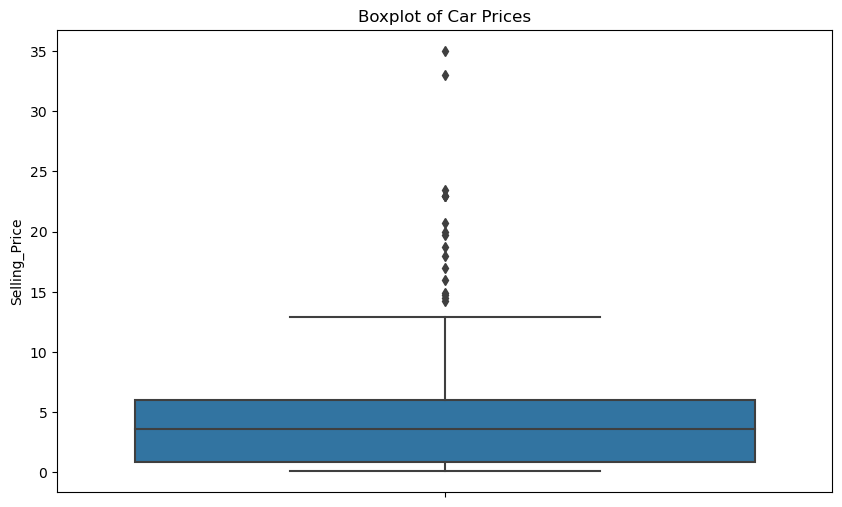

0      1.208960
1      1.558145
2      1.981001
3      1.047319
4      1.526056
         ...   
296    2.251292
297    1.386294
298    1.208960
299    2.442347
300    1.667707
Name: Selling_Price, Length: 301, dtype: float64

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'd3' is your DataFrame with a numerical column 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Selling_Price')
plt.title('Boxplot of Car Prices')
plt.show()
data['Selling_Price']=np.log(data['Selling_Price'])
data['Selling_Price']

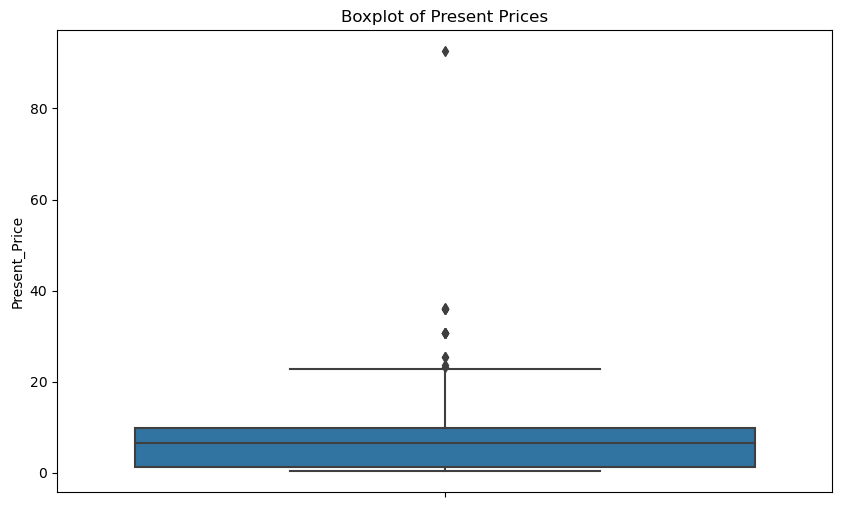

0      1.720979
1      2.255493
2      2.287471
3      1.423108
4      1.927164
         ...   
296    2.451005
297    1.774952
298    2.397895
299    2.525729
300    1.774952
Name: Present_Price, Length: 301, dtype: float64

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'd3' is your DataFrame with a numerical column 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Present_Price')
plt.title('Boxplot of Present Prices')
plt.show()
data['Present_Price']=np.log(data['Present_Price'])
data['Present_Price']

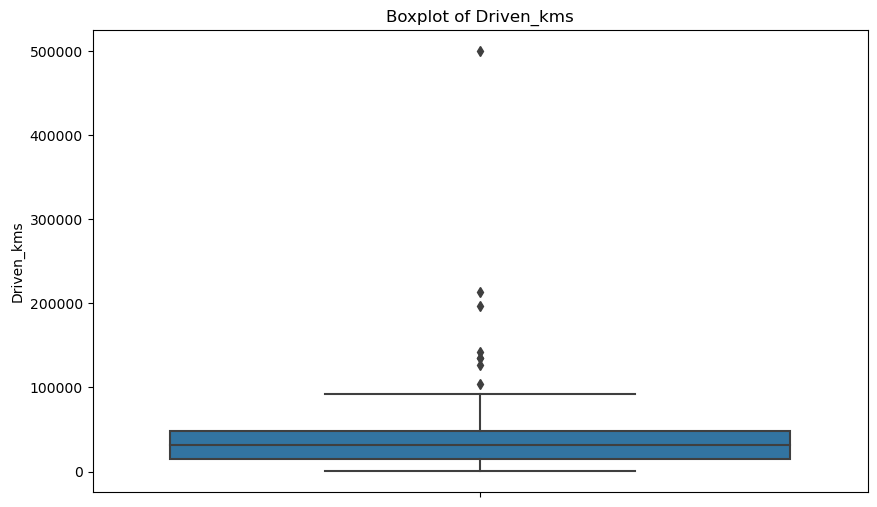

0      10.203592
1      10.668955
2       8.839277
3       8.556414
4      10.656082
         ...    
296    10.433763
297    11.002100
298    11.384342
299     9.104980
300     8.605936
Name: Driven_kms, Length: 301, dtype: float64

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'd3' is your DataFrame with a numerical column 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Driven_kms')
plt.title('Boxplot of Driven_kms')
plt.show()
data['Driven_kms']=np.log(data['Driven_kms'])
data['Driven_kms']


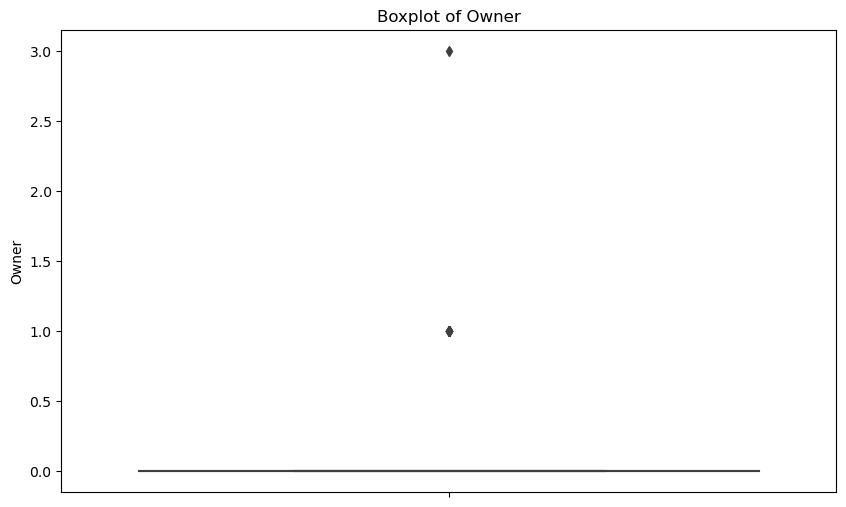

0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
296   -inf
297   -inf
298   -inf
299   -inf
300   -inf
Name: Owner, Length: 301, dtype: float64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'd3' is your DataFrame with a numerical column 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Owner')
plt.title('Boxplot of Owner')
plt.show()
data['Owner']=np.log(data['Owner'])
data['Owner']

<font color='green'>**DATA VISUALIZATION**

In [67]:
data.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [68]:
year = data.Year.value_counts().keys()
no_cars_sold = data.Year.value_counts().values
labels = [str(val) for val in no_cars_sold]

fig = px.bar(x=year, y=no_cars_sold, text=labels, title='Year vs No. of Cars Sold', template='plotly', color_discrete_sequence=['darkviolet'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='no_cars_sold')
fig.update_xaxes(title_text='Year')

# Show the plot
fig.show()


In [69]:
car_name = data.Car_Name.value_counts().head(25).keys()
cars_sold = data.Car_Name.value_counts().head(25).values
labels = [str(val) for val in cars_sold]

fig = px.bar(x=car_name, y=cars_sold, text=labels, title='Top 25 Car Name vs No. of Cars Sold', template='plotly', color_discrete_sequence=['aqua'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars Sold')
fig.update_xaxes(title_text='Car Name')

# Show the plot
fig.show()

In [70]:
data.Fuel_Type.value_counts().head(25)

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [71]:
fuel_type = data.Fuel_Type.value_counts().keys()
cars_count = data.Fuel_Type.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=fuel_type, y=cars_count, text=labels, title='Fuel Type vs Cars count', template='plotly', color_discrete_sequence=['orange'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Fuel Type')

# Show the plot
fig.show()

In [72]:
selling_type = data.Selling_type.value_counts().keys()
cars_count = data.Selling_type.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=selling_type, y=cars_count, text=labels, title='Selling Type vs Cars count', template='plotly', color_discrete_sequence=['yellow'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Selling Type')

# Show the plot
fig.show()

In [73]:
transmission_type = data.Transmission.value_counts().keys()
cars_count = data.Transmission.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=transmission_type, y=cars_count, text=labels, title='Transmission(change of gear) Type vs Cars count', template='plotly', color_discrete_sequence=['red'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Transmission Type')

# Show the plot
fig.show()

In [74]:
ownership_type = data.Owner.value_counts().keys()
cars_count = data.Owner.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=ownership_type, y=cars_count, text=labels, title='Ownership Type vs Cars count', template='plotly', color_discrete_sequence=['gold'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Ownership Type')

# Show the plot
fig.show()

#### Changing the catergorical columns Fuel_Type, Selling_Type, Transmission and Owner Type to Numerical columns

In [75]:
# Changing Fuel Type column : Petrol -> 0, Diesel -> 1 and CNG -> 2
category_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
data['Fuel_Type_encoded'] = data['Fuel_Type'].map(category_mapping)

In [76]:
data.Fuel_Type_encoded.value_counts()

0    239
1     60
2      2
Name: Fuel_Type_encoded, dtype: int64

In [77]:
fuel_type = data.Fuel_Type_encoded.value_counts().keys()
cars_count = data.Fuel_Type_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=fuel_type, y=cars_count, text=labels, title='Fuel Type(encoded) vs Cars count', template='plotly', color_discrete_sequence=['orange'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Fuel Type(encoded)')

# Show the plot
fig.show()

In [78]:
# Changing Selling_Type column : Dealer -> 0, Individual -> 1
category_mapping = {'Dealer': 0, 'Individual': 1}
data['Selling_type_encoded'] = data['Selling_type'].map(category_mapping)

In [79]:
data.Selling_type_encoded.value_counts()

0    195
1    106
Name: Selling_type_encoded, dtype: int64

In [80]:
selling_type = data.Selling_type_encoded.value_counts().keys()
cars_count = data.Selling_type_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=selling_type, y=cars_count, text=labels, title='Selling Type(encoded) vs Cars count', template='plotly', color_discrete_sequence=['yellow'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars(encoded)')
fig.update_xaxes(title_text='Selling Type')

# Show the plot
fig.show()

In [81]:
# Changing Transmission column : Manual -> 0, Automatic -> 1
category_mapping = {'Manual': 0, 'Automatic': 1}
data['Transmission_encoded'] = data['Transmission'].map(category_mapping)

In [82]:
data.Transmission_encoded.value_counts()

0    261
1     40
Name: Transmission_encoded, dtype: int64

In [83]:
transmission_type = data.Transmission_encoded.value_counts().keys()
cars_count = data.Transmission_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=transmission_type, y=cars_count, text=labels, title='Transmission(change of gear)(encoded) Type vs Cars count', template='plotly', color_discrete_sequence=['red'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Transmission Type(encoded)')

# Show the plot
fig.show()

In [84]:
# Changing Owner Type column : 0 -> 0, 1 -> 1 and 3 -> 2
category_mapping = {0: 0, 1: 1, 3: 2}
data['Owner_encoded'] = data['Owner'].map(category_mapping)

In [85]:
data.Owner_encoded.value_counts()

0.0    10
Name: Owner_encoded, dtype: int64

In [86]:
ownership_type = data.Owner_encoded.value_counts().keys()
cars_count = data.Owner_encoded.value_counts().values
labels = [str(val) for val in cars_count]

fig = px.bar(x=ownership_type, y=cars_count, text=labels, title='Ownership Type(encoded) vs Cars count', template='plotly', color_discrete_sequence=['gold'])

# Set the labels for the y-axis and x-axis
fig.update_yaxes(title_text='No. of Cars')
fig.update_xaxes(title_text='Ownership Type(encoded)')

# Show the plot
fig.show()

In [87]:
selected_columns = ['Car_Name','Year','Selling_Price','Present_Price','Driven_kms','Fuel_Type_encoded','Selling_type_encoded','Transmission_encoded','Owner_encoded']

In [88]:
new_data = data[selected_columns]

In [89]:
new_data
#new_data.to_csv('cars price encoded.csv', index=False)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded,Owner_encoded
0,ritz,2014,1.208960,1.720979,10.203592,0,0,0,NaN
1,sx4,2013,1.558145,2.255493,10.668955,1,0,0,NaN
2,ciaz,2017,1.981001,2.287471,8.839277,0,0,0,NaN
3,wagon r,2011,1.047319,1.423108,8.556414,0,0,0,NaN
4,swift,2014,1.526056,1.927164,10.656082,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...
296,city,2016,2.251292,2.451005,10.433763,1,0,0,NaN
297,brio,2015,1.386294,1.774952,11.002100,0,0,0,NaN
298,city,2009,1.208960,2.397895,11.384342,0,0,0,NaN
299,city,2017,2.442347,2.525729,9.104980,1,0,0,NaN


<font color="green">**DATA CORRELATION AND REALATIONS**

In [90]:
new_data.iloc[:,1:].corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded,Owner_encoded
Year,1.000000,0.272282,0.000249,-0.545249,0.053643,-0.039896,-0.000394,NaN
Selling_Price,0.272282,1.000000,0.949709,0.170268,0.456973,-0.851627,0.175041,NaN
Present_Price,0.000249,0.949709,1.000000,0.357448,0.441484,-0.868201,0.193283,NaN
Driven_kms,-0.545249,0.170268,0.357448,1.000000,0.260903,-0.321632,0.019486,NaN
Fuel_Type_encoded,0.053643,0.456973,0.441484,0.260903,1.000000,-0.352415,0.080466,NaN
Selling_type_encoded,-0.039896,-0.851627,-0.868201,-0.321632,-0.352415,1.000000,-0.063240,NaN
Transmission_encoded,-0.000394,0.175041,0.193283,0.019486,0.080466,-0.063240,1.000000,NaN
Owner_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

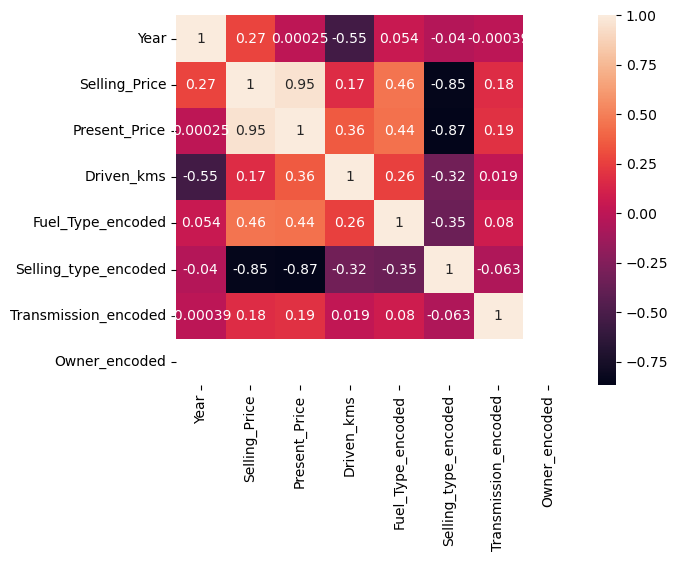

In [91]:
sns.heatmap(new_data.iloc[:,1:].corr(), annot=True)

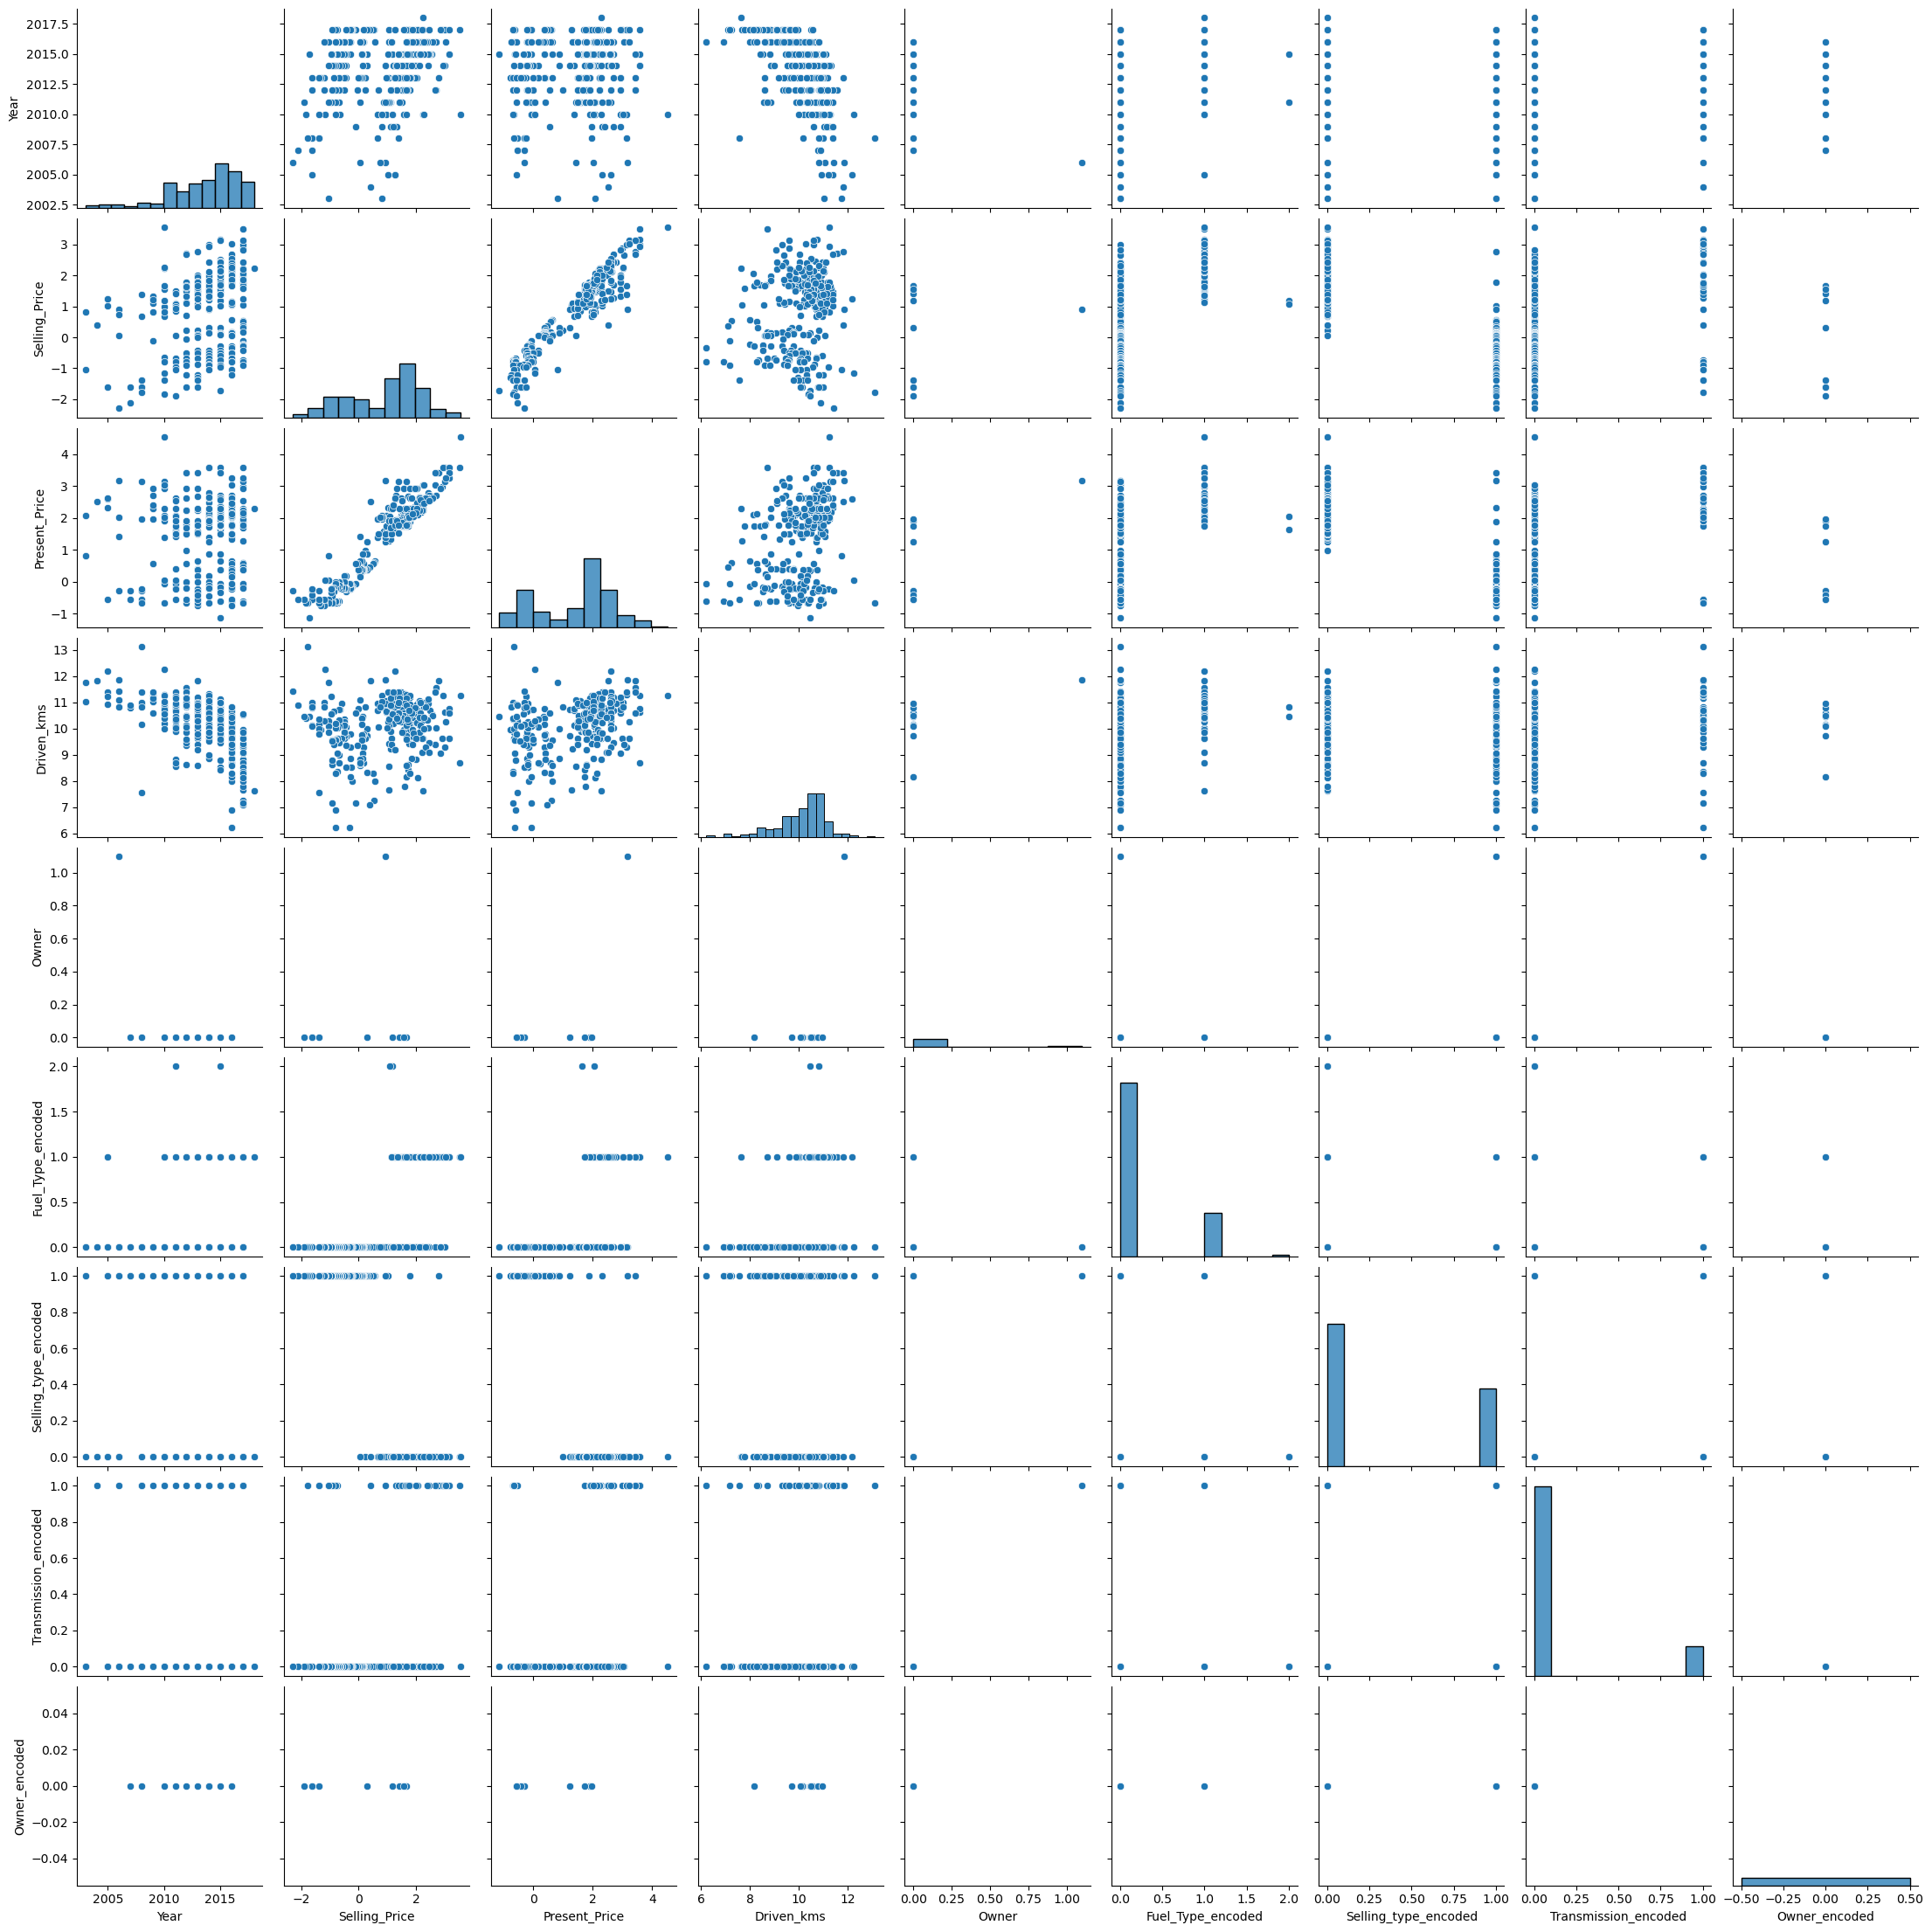

In [92]:
sns.pairplot(data)

#### From the above correlation plot we can infer the following :-
#### A -> Selling_Price is influenced by :<br> (i) Present_price by a score of 0.88
####                                                              (ii) Fuel_Type_encoded by a score of 0.5
####                                                              (iii) Transmission_type by a score of 0.35

#### B -> Present_Price is influenced by : <br> (i) Selling_price by a score of 0.88
####                                                              (ii) Fuel_Type_encoded by a score of 0.43
####                                                              (iii) Transmission_type by a score of 0.33


<font color="green">**ANALYZING DATA DISTRIBUTIONS**

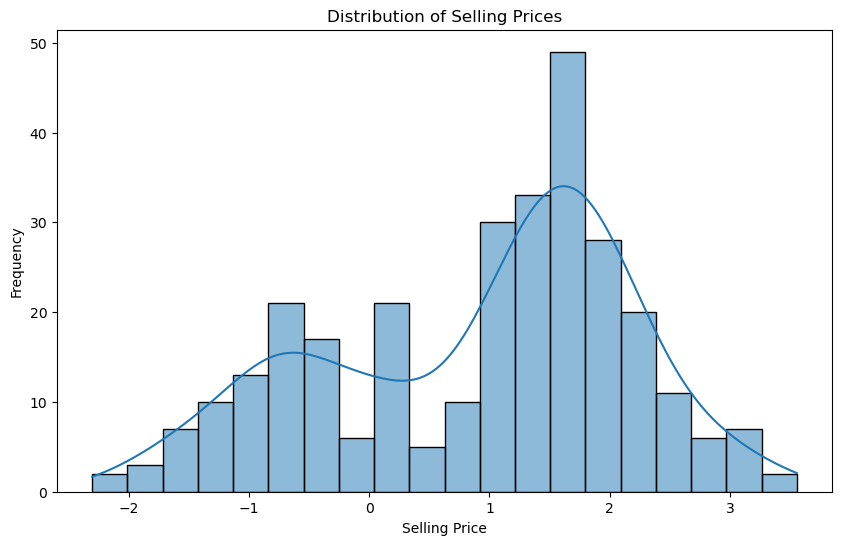

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

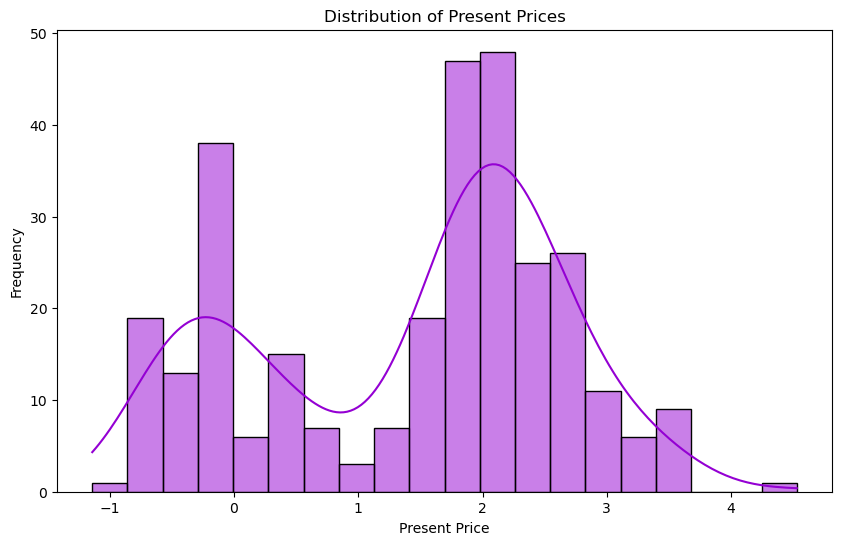

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Present_Price'], bins=20, kde=True, color='darkviolet')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.title('Distribution of Present Prices')
plt.show()

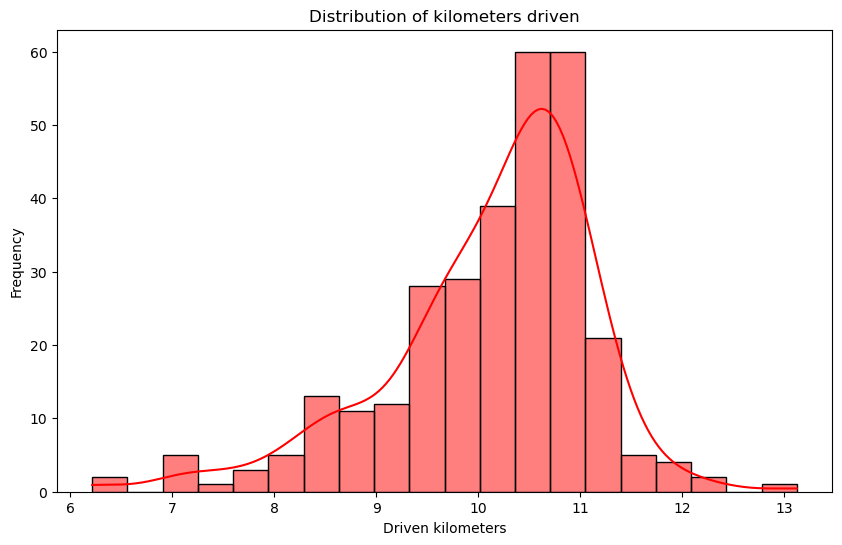

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Driven_kms'], bins=20, kde=True, color='red')
plt.xlabel('Driven kilometers')
plt.ylabel('Frequency')
plt.title('Distribution of kilometers driven')
plt.show()

<font color='green'>**MODEL PREPRARION**

<font color='red'> DATA TRAIN AND TEST

#### Since, we need to predict the price(selling price) of the car using the features of the given dataset

In [96]:
x_data = new_data.drop(['Car_Name','Selling_Price'],axis=1)
y_data = new_data['Selling_Price']

In [97]:
data.isna().sum()

Car_Name                  0
Year                      0
Selling_Price             0
Present_Price             0
Driven_kms                0
Fuel_Type                 0
Selling_type              0
Transmission              0
Owner                     0
Fuel_Type_encoded         0
Selling_type_encoded      0
Transmission_encoded      0
Owner_encoded           291
dtype: int64

In [106]:
data['Owner_encoded'] = data['Owner_encoded'].fillna(data['Owner_encoded'].median())

In [107]:
data.isna().sum()

Car_Name                0
Year                    0
Selling_Price           0
Present_Price           0
Driven_kms              0
Fuel_Type               0
Selling_type            0
Transmission            0
Owner                   0
Fuel_Type_encoded       0
Selling_type_encoded    0
Transmission_encoded    0
Owner_encoded           0
dtype: int64

In [100]:
x_data

,Year,Present_Price,Driven_kms,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded,Owner_encoded
0,2014,1.720979,10.203592,0,0,0,NaN
1,2013,2.255493,10.668955,1,0,0,NaN
2,2017,2.287471,8.839277,0,0,0,NaN
3,2011,1.423108,8.556414,0,0,0,NaN
4,2014,1.927164,10.656082,1,0,0,NaN
...,...,...,...,...,...,...,...
296,2016,2.451005,10.433763,1,0,0,NaN
297,2015,1.774952,11.002100,0,0,0,NaN
298,2009,2.397895,11.384342,0,0,0,NaN
299,2017,2.525729,9.104980,1,0,0,NaN


In [101]:
y_data

0      1.208960
1      1.558145
2      1.981001
3      1.047319
4      1.526056
         ...   
296    2.251292
297    1.386294
298    1.208960
299    2.442347
300    1.667707
Name: Selling_Price, Length: 301, dtype: float64

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

#### 5. Training the Models using the above data

#### (A) -> (i) Training using Linear Regression Model

<font color='green'>**MODEL BUILDING**

<font color='red'>LINEAR REGRESSION

In [109]:
x_data.isna().sum()

Year                      0
Present_Price             0
Driven_kms                0
Fuel_Type_encoded         0
Selling_type_encoded      0
Transmission_encoded      0
Owner_encoded           291
dtype: int64

In [110]:
x_data['Owner_encoded'] = x_data['Owner_encoded'].fillna(x_data['Owner_encoded'].median())

In [111]:
x_data.isna().sum()

Year                    0
Present_Price           0
Driven_kms              0
Fuel_Type_encoded       0
Selling_type_encoded    0
Transmission_encoded    0
Owner_encoded           0
dtype: int64

In [112]:
model_1 = LinearRegression()
model_1.fit(x_data,y_data)

LinearRegression()

#### (ii) Predicting using Linear Regression Model

In [114]:
x_test.isna().sum()

Year                     0
Present_Price            0
Driven_kms               0
Fuel_Type_encoded        0
Selling_type_encoded     0
Transmission_encoded     0
Owner_encoded           60
dtype: int64

In [115]:
x_test['Owner_encoded'] = x_test['Owner_encoded'].fillna(x_test['Owner_encoded'].median())

In [116]:
x_test.isna().sum()

Year                    0
Present_Price           0
Driven_kms              0
Fuel_Type_encoded       0
Selling_type_encoded    0
Transmission_encoded    0
Owner_encoded           0
dtype: int64

In [118]:
y_pred_1 = model_1.predict(x_test)

#### (iii) Evaluting the performance by Linear Regression Model

In [119]:
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.03360927716502737
R-Squared score is : 0.9788322654842232


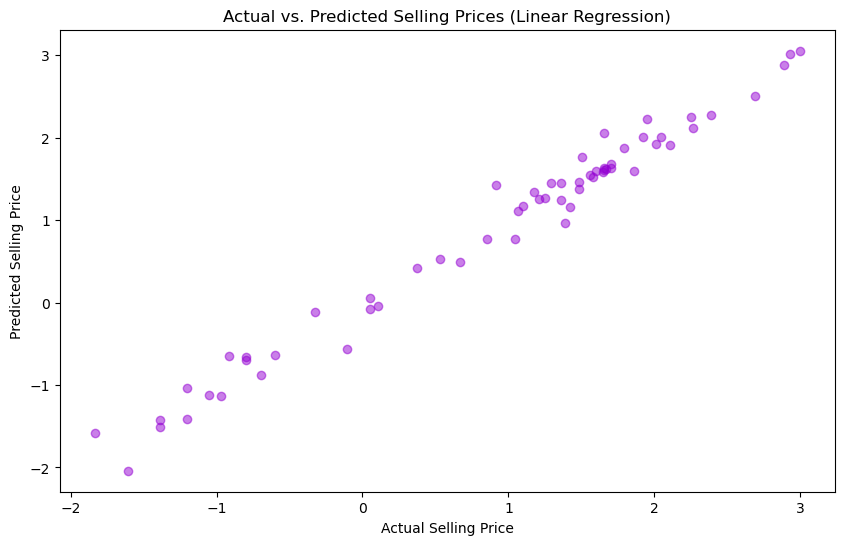

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

<font color='red'>RANDOM FOREST REGRESSION

#### (B) -> (i) Training using the Random Forest Regression Model

In [122]:
x_train.isna().sum()

Year                      0
Present_Price             0
Driven_kms                0
Fuel_Type_encoded         0
Selling_type_encoded      0
Transmission_encoded      0
Owner_encoded           231
dtype: int64

In [124]:
x_train['Owner_encoded'] = x_train['Owner_encoded'].fillna(x_train['Owner_encoded'].median())

In [125]:
x_train.isna().sum()

Year                    0
Present_Price           0
Driven_kms              0
Fuel_Type_encoded       0
Selling_type_encoded    0
Transmission_encoded    0
Owner_encoded           0
dtype: int64

In [126]:
model_2 = RandomForestRegressor() 
model_2.fit(x_train, y_train) 

RandomForestRegressor()

#### (ii) Predicting using Random Forest Regression Model

In [127]:
y_pred_2 = model_2.predict(x_test)

#### (iii) Evaluting the performance by Random Forest Regression Model

In [128]:
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.06273652910509891
R-Squared score is : 0.960487392037104


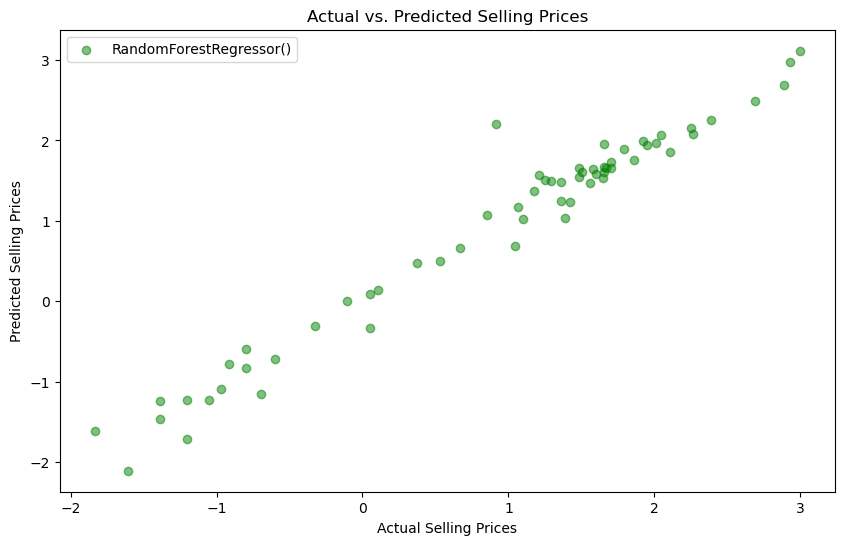

In [129]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_2, label=model_2, alpha=0.5, color='green')

plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs. Predicted Selling Prices")
plt.legend()
plt.show()